# Investigación 1

Este trabajo consiste en un ejercicio de aplicar un análisis sobre un dataset tipo Clase 2 (no trivial), preparándolo para una etapa de determinación del modelo mediante técnicas de Machine Learning (preprocesado) y realizando análisis estadísticos para encontrar patrones y distribuciones de datos, en aras de seleccionar la técnica de aprendizaje automático más adecuada.

En esta investigación se analizarán los datasets para el año 2017-2018 de infracciones al tránsito en la región de Torino, Italia. Los datasets están disponibles en el sitio de [datos del gobierno](https://www.dati.gov.it/view-dataset?groups=giustizia%7Ctrasporti&Cerca=&page=0).

El enfoque del preprocesamiento es realizar un análisis de posibles enfoques en determinar la probabilidad de una multa dado el tipo de vehículo, la hora del día y el tipo de multa más susceptible. No obstante, se analizarán otros posibles enfoques mediante un EDA.

Comenzaremos con importar las bibliotecas necesarias para esta tarea.

In [1]:
# For array handling
import numpy as np
# For plotting
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# For data management
import pandas as pd
# For colours
import seaborn as sns

## Carga de los datos

Posteriormente, se descargan los datos que se ocupan. En este caso, la próxima celda descargará los datos correspondientes a los años 2017-2018, ya que esto implicaría unir 4 datasets mediante Pandas.
Igualmente, se descargarán los datos en caso de que únicamente no se hayan descargado.

In [2]:
%%bash
mkdir data &> /dev/null || echo "Directory already exists"
cd data
cat 2018_Gennaio-Giugno.csv &> /dev/null || \
wget http://www.comune.torino.it/opendata/sicurezza/OpenData_VCS_2018_Gennaio-Giugno.csv -O "2018_Gennaio-Giugno.csv"
cat 2018_Luglio-Dicembre.csv &> /dev/null || \
wget http://www.comune.torino.it/opendata/sicurezza/OpenData_VCS_2018_Luglio-Dicembre.csv -O "2018_Luglio-Dicembre.csv"
cat 2017_Gennaio-Giugno.csv &> /dev/null || \
wget http://www.comune.torino.it/opendata/sicurezza/VCS2017_gen_giu.csv -O "2017_Gennaio-Giugno.csv"
cat 2017_Luglio-Dicembre.csv &> /dev/null || \
wget http://www.comune.torino.it/opendata/sicurezza/VCS%20lug-dic%202017.csv -O "2017_Luglio-Dicembre.csv"

Directory already exists


Con Pandas, abrimos todos los archivos y verificamos que las etiquetas coincidan.

In [3]:
df = {}
df["2017_1"] = pd.read_csv('data/2017_Gennaio-Giugno.csv', sep=',',header=0)
df["2017_2"] = pd.read_csv('data/2017_Luglio-Dicembre.csv', sep=',',header=0)
df["2018_1"] = pd.read_csv('data/2018_Gennaio-Giugno.csv', sep=',',header=0)
df["2018_2"] = pd.read_csv('data/2018_Luglio-Dicembre.csv', sep=',',header=0)

In [4]:
print("For 2017, sem 1\n", df["2017_1"].columns, "shape: ", df["2017_1"].shape)
print("For 2017, sem 2\n", df["2017_2"].columns, "shape: ", df["2017_2"].shape)
print("For 2018, sem 1\n", df["2018_1"].columns, "shape: ", df["2018_1"].shape)
print("For 2018, sem 2\n", df["2018_2"].columns, "shape: ", df["2018_2"].shape)

For 2017, sem 1
 Index(['Anno', 'Reg', 'Articolo', 'Classe', 'Dat Infr', 'Loc1', 'Numciv1',
       'Bisinternolettera', 'Loc2', 'Ora Infr', 'Sanzione accessoria',
       'Tipoinfr', 'Numero Verbali', 'Sanzioni'],
      dtype='object') shape:  (330587, 14)
For 2017, sem 2
 Index(['Anno', 'Reg', 'Articolo', 'Classe', 'Dat Infr', 'Loc1', 'Numciv1',
       'Bisinternolettera', 'Loc2', 'Ora Infr', 'Sanzione accessoria',
       'Tipoinfr', 'Numero Verbali', 'Sanzioni'],
      dtype='object') shape:  (327740, 14)
For 2018, sem 1
 Index(['Anno', 'Reg', 'Articolo', 'Classe', 'Dat Infr', 'Loc1', 'Numciv1',
       'Bisinternolettera', 'Loc2', 'Ora Infr', 'Sanzione accessoria',
       'Tipoinfr', 'Numero Verbali', 'Sanzioni'],
      dtype='object') shape:  (404098, 14)
For 2018, sem 2
 Index(['Anno', 'Reg', 'Articolo', 'Classe', 'Dat Infr', 'Loc1', 'Numciv1',
       'Bisinternolettera', 'Loc2', 'Ora Infr', 'Sanzione accessoria',
       'Tipoinfr', 'Numero Verbali', 'Sanzioni'],
      dtype='object

De acuerdo con las etiquetas de las columnas, es posible combinar los datasets sin problema, ya que contienen las mismas etiquetas.

In [5]:
dfm = pd.concat(df.values(), ignore_index=True)
# Verify that the shape is the sum of the shapes printed above
dfm.shape

(1443676, 14)

In [6]:
dfm.head(5)

Anno           Reg  Articolo       Classe    Dat Infr  \
0  2017  Legge 285/92       142  Autovettura  01/01/2017   
1  2017  Legge 285/92         7  Autovettura  01/01/2017   
2  2017  Legge 285/92       142  Autovettura  01/01/2017   
3  2017  Legge 285/92       142  Autovettura  01/01/2017   
4  2017  Legge 285/92         7  Autovettura  01/01/2017   

                      Loc1 Numciv1 Bisinternolettera                     Loc2  \
0  UNITA' D'ITALIA/(CORSO)      96           AFR.EST                  (Altri)   
1       ORFANE/(VIA DELLE)       .               NaN  VISITAZIONE/(PIAZZETTA)   
2  UNITA' D'ITALIA/(CORSO)      96           AFR.EST                  (Altri)   
3  UNITA' D'ITALIA/(CORSO)      96           AFR.EST                  (Altri)   
4       ORFANE/(VIA DELLE)       .               NaN  VISITAZIONE/(PIAZZETTA)   

  Ora Infr Sanzione accessoria             Tipoinfr  Numero Verbali  Sanzioni  
0     0:00          (Mancante)  Limiti di Velocita'               1         1  
1     0:02          (Mancante)  Sensi unici, svolte               1         1  
2     0:05          (Mancante)  Limiti di Velocita'               1         1  
3     0:06          (Mancante)  Limiti di Velocita'               1         1  
4     0:10          (Mancante)  Sensi unici, svolte               1         1

## Entendimiento de las columnas

Como el dataset está en italiano, se procederá a realizar sustituciones de valores al inglés para mejorar la universalidad del análisis.

Por el momento, se puede sobreentender con ayuda de un traductor y observando los datos que:

* Anno = year
* Reg = regulation
* Articolo = article
* Dat Infr = infraction_date
* Loc1 = infraction_location
* Ora Inft = infraction_time
* Tipoinft = infraction_type
* Sanzioni = number_sanctions
* Numero Verbali = number_warnings

Los que no quedan claros son:

* Classe
* Numciv1
* Bisinternolettera
* Loc2
* Sanzione accessoria

Para analizar los faltantes, se exploraran todos los valores que toman dichos atributos.

Para **Classe**:

In [7]:
dfm["Classe"].value_counts()

Autovettura                       1327387
Autocarro                           67160
Autocarro merci                     26864
Motociclo                           11866
Non veicolo                          2608
Autoveicolo speciale                 2031
(Altri)                              1908
Ciclomotore                          1450
Autobus                               950
Rimorchio merci                       539
Quadriciclo trasporto merci           330
Trattore stradale                     123
Motoveicolo                            98
Autoveicolo speciale con rimo.         89
Autocaravan                            73
Mezzi d opera                          28
Autoveicolo Promiscuo                  24
AUTOVETTURA CON RIMORCHIO              23
Autocarro merci > 3,5 t                21
Autocarro con rimorchio                15
Macchina operatrice                    15
Motocarro                              11
Mototrattore                            9
Quadriveicolo                     

A partir de los valores presentados arriba, la **Classe** se refiere al tipo de vehículo de la infracción. También, es posible notar que existen algunas repeticiones que pueden no ser pertinentes para un análisis, dependiendo del enfoque del modelo que se desea. Por ejemplo, tenemos dos repeticiones para camión de comercio:

* Autocarro merci
* Autocarro merci > 3,5 t
* Autocarro con rimorchio
* Autocarro

El impacto que tienen estas "clases" de vehículos es que crean sub-clases que son minoritarias, lo que puede afectar un análisis por biasing. 

Por otra parte, es posible notar que el dataset está desbalanceado con respecto al tipo de vehículos. Existe una gran cantidad de instancias que pertenecen a vehículos particulares (Autovettura), seguido de los camiones (Autocarro). Continuaremos con la simplificación de estas clases más adelante.

Para **Numciv1**, este indica el número cívil, que es el número que se le da a los edificios en cada calle (strada). Esto indica la dirección:

https://it.wikipedia.org/wiki/Numero_civico

Para tener una mejor idea, una síntesis de todos los posibles valores es presentada a continuación:

In [8]:
dfm["Numciv1"].value_counts()

.      519066
96     112282
21      42182
401     37913
15      35562
        ...  
618         1
720         1
578         1
474         1
911         1
Name: Numciv1, Length: 582, dtype: int64

Es posible notar que existen muchos datos faltantes en este atributo. Existen alrededor de un 30% de valores faltantes y otros valores se distribuyen en valores que son menores al 1%. Con esta columna, puede que el tratamiento de datos sea más complicado de realizar, ya que existe mucha imprecisión en la locación del incidente.

Para **Bisinternolettera**:

In [9]:
dfm["Bisinternolettera"].value_counts()

FR         166887
AFRONTE     74212
A           67360
AFR.EST     58042
L           34781
            ...  
PLXB50          1
PRL08           1
PLRL63          1
PLME122         1
PLLEU2          1
Name: Bisinternolettera, Length: 5797, dtype: int64

Observando los posibles valores que puede tomar, no es posible deducir su significado. Por ello, consultando una [tesis](https://webthesis.biblio.polito.it/7318/1/tesi.pdf) donde explica los valores:

> Bisinternolettera: è un campo che determina l’interno  del  civico  e  può  essere rappresentato come numero o lettera o serie di numeri e lettere (es. 31/A)

Es un campo que ayuda a ubicar a lo interno de una casa/localización. Este puede ser representado como una letra. Por lo tanto, este valor va ligado al número cívico, cuyos problemas ya se expusieron anteriormente.

Para **Loc2**

In [10]:
dfm["Loc2"].value_counts()

(Altri)                           944489
MATTEOTTI/GIACOMO (CORSO)          53457
BECCARIA/GIAMBATTISTA (CORSO)      35945
PALESTRO/(CORSO)                   34324
BERTOLA/ANTONIO GIUSEPPE (VIA)     32337
                                   ...  
AZUNI/ALBERTO (VIA)                    1
NICCOLINI/G.B. (VIA)                   1
APPROCCI/(VIA DEGLI)                   1
LEGA/SILVESTRO (VIA)                   1
MONTE SEI BUSI/(VIA)                   1
Name: Loc2, Length: 2052, dtype: int64

Este campo explica lo que existe en la localización **Loc1**. Tiene un serio problema de desbalance por datos no existentes (etiquetados como *Altri*, que significa *otro*).

Para **Sanzione accessoria**:

In [11]:
dfm["Sanzione accessoria"].value_counts()

(Mancante)                                                                                                                1421076
RIMOZIONE VEICOLO (ART. 159 E 215)                                                                                           6792
Comunicazione alla Prefettura per sospensione Patente (art.218?223)                                                          5299
SEQUESTRO AMM.VO DEL VEICOLO (ART. 213)                                                                                      4509
VEICOLO SOSPESO DALLA CIRCOLAZIONE CON ANNOTAZIONE SUL DOCUMENTO DI CIRCOLAZIONE.                                            1686
RIPRISTINO DEI LUOGHI (ART.211)                                                                                              1203
FERMO AMMINISTRATIVO DEL VEICOLO PER UN TEMPODETERMINATO (ART. 214)                                                           864
CONFISCA AMMINISTRATIVA DEL VEICOLO O ALTRE COSE ? SEQUESTRO (ART. 213)                   

Este campo indica una acción adicional a la sanción por la ley de tránsito. Dentro de algunos ejemplos:

* FERMO DEL VEICOLO FINO A RILASCIO DOCUMENTO: que el vehiculo se saca de circulación hasta el retiro del documento.
* SOSPENSIONE ATTIVITA': suspención de actividades
* RITIRO PATENTE: retiro de la patente.

Sin embargo, el que tiene mayor cantidad de instancias es el atributo *Macante*, que indica que el campo está faltante (missing).

### Traducción de las columnas

In [12]:
dfm.columns = ['year', 'regulation', 'article', 'vehicle_class', 'infraction_date', 'infraction_location', 'infraction_civil_number',
       'infraction_internal_number', 'infraction_location_details', 'infraction_hour', 'additional_infraction',
       'infraction_type', 'number_warnings', 'number_infractions']
dfm.columns

Index(['year', 'regulation', 'article', 'vehicle_class', 'infraction_date',
       'infraction_location', 'infraction_civil_number',
       'infraction_internal_number', 'infraction_location_details',
       'infraction_hour', 'additional_infraction', 'infraction_type',
       'number_warnings', 'number_infractions'],
      dtype='object')

## Entendimientos de los valores

Hasta el momento, se han analizado:
    
* Classe: tipo de vehículo
* Numciv1: número cívil
* Bisinternolettera: número interno
* Loc2: descripción de la localización
* Sanzione accessoria: sanción adicional

Para los últimos cuatro, se determinó que la calidad observada de estos atributos es pobre, debido a la gran cantidad de datos faltantes. Esto añade la opción de eliminarlos debido a que el potencial que añaden a predicciones es mínima, a no ser que se tome para determinar lugares concurridos de infracciones, pero esto necesitaría de otros atributos que lo fortalezcan: creación de atributos compuestos.

En cuanto a la **classe**, existen clases de instancias que pueden ser factorizadas en clases más grandes, disminuyendo el desbalance.

Comenzando en orden, se analizará lo que es fecha y hora. Se imprimirá la representación de estos datos.

In [13]:
dfm.dtypes

year                            int64
regulation                     object
article                         int64
vehicle_class                  object
infraction_date                object
infraction_location            object
infraction_civil_number        object
infraction_internal_number     object
infraction_location_details    object
infraction_hour                object
additional_infraction          object
infraction_type                object
number_warnings                 int64
number_infractions              int64
dtype: object

### Tiempo de la infracción

De acuerdo con los tipos, el año es representado como número, mientras que la fecha y la hora como objetos (posiblemente strings). Igualmente, es redundante tener dos campos con el año. Se unirán estas columnas en una sola llamada `infraction_time`.

In [14]:
dfm["infraction_date"].value_counts()

04/10/2018    3606
01/12/2017    3515
20/11/2018    3430
10/05/2018    3394
07/12/2017    3388
              ... 
14/08/2017     425
21/08/2017     398
19/08/2017     369
13/08/2017     345
20/08/2017     337
Name: infraction_date, Length: 730, dtype: int64

Los datos de la columna `infraction_date` están en formato `dd/mm/yyyy`. Se concatenará cada fila con la hora para tener una única entrada con tiempos, pero en string.

In [15]:
dfm["infraction_time_str"] = dfm["infraction_date"] + ":" + dfm["infraction_hour"]

In [16]:
dfm["infraction_time_str"].head()

0    01/01/2017:0:00
1    01/01/2017:0:02
2    01/01/2017:0:05
3    01/01/2017:0:06
4    01/01/2017:0:10
Name: infraction_time_str, dtype: object

Ahora, se procede a hacer la conversión al tipo de dato de tiempo, que es más ligero que un string y mejor indexado.

In [17]:
dfm["infraction_time"] = pd.to_datetime(dfm["infraction_time_str"], format='%d/%m/%Y:%H:%M', errors='ignore')

In [18]:
dfm["infraction_time"].head()

0   2017-01-01 00:00:00
1   2017-01-01 00:02:00
2   2017-01-01 00:05:00
3   2017-01-01 00:06:00
4   2017-01-01 00:10:00
Name: infraction_time, dtype: datetime64[ns]

### Detalles acerca de la ley

En esta sección se analizan los detalles relevantes al tipo de infracción, la regulación y la ley. Se pretende observar los posibles valores y buscar posibles simplificaciones.

In [19]:
dfm["regulation"].value_counts()

Legge 285/92                                       1443372
Legge 727/78                                           148
D.P.R. 474 del 24/11/2001                              136
D.Lgs.vo 286 del 21/11/2005 (autotrasportatori)         20
Name: regulation, dtype: int64

De acuerdo con la sintaxis de arriba y este [sitio](http://www.patente.it/normativa/legge-13-11-1978-n-727-controllo-degli-impieghi-temporali-nel-settore-dei-trasporti-su-strada?idc=1527), las leyes se componen de número/año. Expandiendo su significado:

* Legge 285/92: [ley general de la autovía](https://www.bosettiegatti.eu/info/norme/statali/1992_0285.htm)
* Legge 727/78: [ley de tiempo de uso de transporte](http://www.patente.it/normativa/legge-13-11-1978-n-727-controllo-degli-impieghi-temporali-nel-settore-dei-trasporti-su-strada?idc=1527)
* D.P.R. 474: [decreto presidencial para el ensayo de vehiculos](http://www.patente.it/normativa/decreto-legge-24-11-2001-n-474-circolazione-prova-veicoli?idc=211)
* D.Lgs.vo 286: [normas de conducta para los extranjeros](https://www.camera.it/parlam/leggi/deleghe/98286dl.htm)

Observando los tipos de leyes y su población, este atributo puede que no agregue valor para un análisis debido al gran desbalance y a la inexistencia de datos reales. Además, algunos son decretos que son específicos.

Es posible que el dato de las multas a extranjeros sea interesante, aunque su cantidad de datos es muy mínima.

En cuanto a los *artículos*, es necesario realizar un match entre el número de artículo y la ley.

In [20]:
dfm["article"].value_counts()

7      965937
158    201441
142    156549
157     32696
126     15496
        ...  
18          1
99          1
90          1
8           1
207         1
Name: article, Length: 108, dtype: int64

Observando a la cantidad de datos, es altamente probable que los 5 primeros datos sean de la ley 285/92, debido a su cantidad de entradas. Es posible notar que existen en total 108 clases de artículos presentes en el análisis. Sin embargo, los primeros cinco tienen una probabilidad de ocurrencia de:

* 7 -> 66.9%
* 158 -> 14.0%
* 142 -> 10.8%
* 157 -> 2.26%
* 126 -> 1.07%

Se puede pensar en realizar un recorde de estas clases, suponiendo que las clases restantes después de la 5ta más probable tendrá una población de: 5%. Esto se analizará más adelante.

En cuanto al *tipo de infracción*:

In [21]:
dfm["infraction_type"].value_counts()

Sosta                   701580
Sensi unici, svolte     504007
Limiti di Velocita'     156549
Altre violazioni         22741
Patente Scaduta di V     15496
Uso telefonino            8002
Revisione                 6928
Cinture di sicurezza      6421
Equipag./Efficienza       2257
Senza assic./scaduta      2248
Velocita pericolosa       2048
Precedenza                1892
Senza carta di circ.      1760
Cambio di direzione       1610
Senza patente             1502
Cantieri stradali         1402
Inoss. limit. traff.      1085
Senza tagliando            922
Guida Senza Patente        714
Guida infl.alcool          658
Corsie, strade ris.        601
Posizione veicoli          589
Sorpasso                   460
Comportamento pedoni       403
Veicoli stranieri          364
Trasporti irregolari       272
Segn.luminosi agenti       231
Illuminazione              177
Senza lenti o altro        157
Segnalaz. acustiche        148
Mancanza casco             113
Aggiorn. carta circ.       110
Segnalet

En cuanto a este rubro, se pueden ver mejores detalles del tipo de multa. Observando los 10 más comunes:

Sosta                   701580: parqueo indebido
Sensi unici, svolte     504007: conducción en contra vía
Limiti di Velocita'     156549: límite de velocidad
Altre violazioni         22741: otra violación
Patente Scaduta di V     15496: patente (permiso de circulación) vencido
Uso telefonino            8002: uso del teléfono
Revisione                 6928: falta de revisión técnica
Cinture di sicurezza      6421: cinturón de seguridad
Equipag./Efficienza       2257: sobre carga
Senza assic./scaduta      2248: sin seguro
Velocita pericolosa       2048: velocidad peligrosa

Sin embargo, existen algunas multas que son específicas para los vehículos, como por ejemplo:

* Mancanza casco: sin casco (motocicleta)
* Cinture di sicurezza: carro

Se deben agrupar estos tipos de multas para cada vehículo en caso de realizar un análisis más detallado. 

### Relacionado a los números de advertencias y de sanciones

Los campos de interés son:

* number_warnings
* number_infractions

In [22]:
dfm["number_warnings"].value_counts()

1     1338935
2       79812
3       13942
4        4782
5        2073
6        1169
0         872
7         721
8         475
9         305
10        168
11        118
12         96
13         58
14         40
15         39
17         16
16         15
19         10
20         10
18          9
21          6
22          3
23          2
Name: number_warnings, dtype: int64

In [23]:
dfm["number_infractions"].value_counts()

1     1338881
2       80674
3       13981
4        4789
5        2076
6        1172
7         721
8         481
9         305
10        168
11        119
12         98
13         58
14         42
15         38
16         17
17         16
19         10
20         10
18          9
21          6
22          3
23          2
Name: number_infractions, dtype: int64

Para el caso de análisis, el `number_warnings` se refiere al número de advertencias por las que se ha infringido la ley, mientras que el `number_infractions` se refiere a aquellas infracciones que han sido materializadas (o efectivas). Se requiere un poco más de análisis para determinar cómo ayudan o impactan estos atributos.

### Datos de localización

Es posible que se pueda hacer una simplificación o generalización de las localizaciones, ya sea mediante la supresión del número cívico y el número interno o una composición de los campos. Antes de ello, se realizará la observación de los valores posibles.

In [24]:
dfm["infraction_location"].value_counts()

UNITA' D'ITALIA/(CORSO)       110982
VENTI SETTEMBRE/(VIA)          63682
REGINA MARGHERITA/(CORSO)      57484
ACCADEMIA ALBERTINA/(VIA)      52562
MILANO/(VIA)                   38950
                               ...  
LUZZATTI/LUIGI (VIA)               1
BONFANTE/PIETRO (VIA)              1
RICCI/GIUSEPPE (VIA)               1
VIASSA/(STRADA DELLA)              1
S. VITO/(STRADA ANTICA DI)         1
Name: infraction_location, Length: 2168, dtype: int64

In [25]:
dfm["infraction_civil_number"].value_counts()

.      519066
96     112282
21      42182
401     37913
15      35562
        ...  
618         1
720         1
578         1
474         1
911         1
Name: infraction_civil_number, Length: 582, dtype: int64

In [26]:
dfm["infraction_location_details"].value_counts()

(Altri)                           944489
MATTEOTTI/GIACOMO (CORSO)          53457
BECCARIA/GIAMBATTISTA (CORSO)      35945
PALESTRO/(CORSO)                   34324
BERTOLA/ANTONIO GIUSEPPE (VIA)     32337
                                   ...  
AZUNI/ALBERTO (VIA)                    1
NICCOLINI/G.B. (VIA)                   1
APPROCCI/(VIA DEGLI)                   1
LEGA/SILVESTRO (VIA)                   1
MONTE SEI BUSI/(VIA)                   1
Name: infraction_location_details, Length: 2052, dtype: int64

Para efectos de la localización, `infraction_location` brinda mejores datos en cuanto a completitud, ya que no presenta una mayoría de datos faltantes, comparado a los otros dos atributos como `infraction_civil_number`, con más de un 30% de datos faltantes y `infraction_location_details` con más de un 50%. No obstante, puede que algunas direcciones (`location`) sean menos exactas o muy extensas, por lo que puede usarse el `civil_number` para una mejor precisión. Para ello, se pueden reemplazar los faltantes del número cívico con un string vacío para posteriormente concatenarlos. Es decir: `infraction_location` + `infraction_civil_number`.

In [27]:
dfm["infraction_civil_number"] = dfm["infraction_civil_number"].str.replace('.', '', regex=False)

In [28]:
dfm["infraction_location_full"] = dfm["infraction_location"] + " " + dfm["infraction_civil_number"]
dfm["infraction_location_full"].head()

0    UNITA' D'ITALIA/(CORSO) 96
1           ORFANE/(VIA DELLE) 
2    UNITA' D'ITALIA/(CORSO) 96
3    UNITA' D'ITALIA/(CORSO) 96
4           ORFANE/(VIA DELLE) 
Name: infraction_location_full, dtype: object

In [29]:
dfm["infraction_location_full"].value_counts()

UNITA' D'ITALIA/(CORSO) 96       110686
VENTI SETTEMBRE/(VIA)             62164
REGINA MARGHERITA/(CORSO) 401     37910
ACCADEMIA ALBERTINA/(VIA) 21      33815
STATUTO/(PIAZZA)                  33500
                                  ...  
ALBISOLA/(VIA) 83                     1
SANSOVINO/ANDREA (VIA) 44             1
SAORGIO/(VIA) 10                      1
SALICETO/(VIA) 14                     1
PERRERO/(VIA) 39                      1
Name: infraction_location_full, Length: 38682, dtype: int64

Con la unión de `infraction_location` + `infraction_civil_number`, la cantidad de registros de localización se enriqueció de 2168 registros a 38682 registros. Eso es inferior a la combinación de ambos atributos `2168*582=1261776`, lo que indica que hay repeticiones.

Asimismo, es posible notar que la mayoría de infracciones ocurrieron en *Corso Unità D'Italia 96*:

![](https://i.ibb.co/PrsQjjh/research-1.png)

In [30]:
mask = dfm["infraction_location_full"] == "UNITA' D'ITALIA/(CORSO) 96"
dfm[mask]["infraction_type"].value_counts()

Limiti di Velocita'    110685
Altre violazioni            1
Name: infraction_type, dtype: int64

Debido a que dicha dirección es una autopista, lo más probable es que sea por límite de velocidad, tal como indica el resultado anterior. Puede que haya presencia de cámaras de control de tráfico. Esto es una parte de los datos que son interesantes.

## Síntesis de los datos

Una vez completado el análisis de cada atributo y sus pormenores. Es posible reducir el dataset con algunas factorizaciones. El dataset queda de la siguiente manera:

In [31]:
dfm.head()

year    regulation  article vehicle_class infraction_date  \
0  2017  Legge 285/92      142   Autovettura      01/01/2017   
1  2017  Legge 285/92        7   Autovettura      01/01/2017   
2  2017  Legge 285/92      142   Autovettura      01/01/2017   
3  2017  Legge 285/92      142   Autovettura      01/01/2017   
4  2017  Legge 285/92        7   Autovettura      01/01/2017   

       infraction_location infraction_civil_number infraction_internal_number  \
0  UNITA' D'ITALIA/(CORSO)                      96                    AFR.EST   
1       ORFANE/(VIA DELLE)                                                NaN   
2  UNITA' D'ITALIA/(CORSO)                      96                    AFR.EST   
3  UNITA' D'ITALIA/(CORSO)                      96                    AFR.EST   
4       ORFANE/(VIA DELLE)                                                NaN   

  infraction_location_details infraction_hour additional_infraction  \
0                     (Altri)            0:00            (Mancante)   
1     VISITAZIONE/(PIAZZETTA)            0:02            (Mancante)   
2                     (Altri)            0:05            (Mancante)   
3                     (Altri)            0:06            (Mancante)   
4     VISITAZIONE/(PIAZZETTA)            0:10            (Mancante)   

       infraction_type  number_warnings  number_infractions  \
0  Limiti di Velocita'                1                   1   
1  Sensi unici, svolte                1                   1   
2  Limiti di Velocita'                1                   1   
3  Limiti di Velocita'                1                   1   
4  Sensi unici, svolte                1                   1   

  infraction_time_str     infraction_time    infraction_location_full  
0     01/01/2017:0:00 2017-01-01 00:00:00  UNITA' D'ITALIA/(CORSO) 96  
1     01/01/2017:0:02 2017-01-01 00:02:00         ORFANE/(VIA DELLE)   
2     01/01/2017:0:05 2017-01-01 00:05:00  UNITA' D'ITALIA/(CORSO) 96  
3     01/01/2017:0:06 2017-01-01 00:06:00  UNITA' D'ITALIA/(CORSO) 96  
4     01/01/2017:0:10 2017-01-01 00:10:00         ORFANE/(VIA DELLE)

Dentro de las columnas que pueden atribuir gran valor para el análisis, hasta este paso, están:

* `infraction_time`: resume la fecha y la hora de la infracción
* `infraction_location_full`: resume la localización casi exacta de la infracción
* `infraction_type`: resume el tipo de infracción
* `vehicle_class`: resume el tipo de vehículo **falta simplificación**
* `infraction_hour`: permite conocer la distribución de las infracciones en el día **falta curación de formato**
* `infraction_type`: puede dar una idea de las épocas con mayor número de infracciones
* `infraction_location`: resume la calle o autopista

Dentro de las columnas con sospechas de bias o correlación:

* `regulation`: puede estar ligada a `infraction_type`
* `article`: puede estar ligada a `infraction_type`

Dentro de las columnas que se pueden desechar:

* `year`: faltan datos para hacer estudios anuales
* `infraction_civil_number`: no es un atributo que genere valor por sí solo.
* `infraction_internal_number`: no es un atributo que genere valor por sí solo.
* `infraction_internal_number`: no es un atributo que genere valor por sí solo.
* `infraction_time_str`: es un paso intermedio

Faltan estudiar:

* `number_warnings`
* `number_infractions`

### Curación de hora y fecha

In [32]:
dfm["infraction_date"] = pd.to_datetime(dfm["infraction_date"], format='%d/%m/%Y', errors='ignore')
dfm["infraction_hour"] = pd.to_datetime(dfm["infraction_hour"], format='%H:%M', errors='ignore')

In [33]:
dfm_debugged = dfm[["vehicle_class", "infraction_date", "infraction_location", \
                    "infraction_hour", "infraction_type", "infraction_time", \
                    "infraction_location_full", "number_warnings", "number_infractions"]]

In [34]:
dfm_debugged.head()

vehicle_class infraction_date      infraction_location     infraction_hour  \
0   Autovettura      2017-01-01  UNITA' D'ITALIA/(CORSO) 1900-01-01 00:00:00   
1   Autovettura      2017-01-01       ORFANE/(VIA DELLE) 1900-01-01 00:02:00   
2   Autovettura      2017-01-01  UNITA' D'ITALIA/(CORSO) 1900-01-01 00:05:00   
3   Autovettura      2017-01-01  UNITA' D'ITALIA/(CORSO) 1900-01-01 00:06:00   
4   Autovettura      2017-01-01       ORFANE/(VIA DELLE) 1900-01-01 00:10:00   

       infraction_type     infraction_time    infraction_location_full  \
0  Limiti di Velocita' 2017-01-01 00:00:00  UNITA' D'ITALIA/(CORSO) 96   
1  Sensi unici, svolte 2017-01-01 00:02:00         ORFANE/(VIA DELLE)    
2  Limiti di Velocita' 2017-01-01 00:05:00  UNITA' D'ITALIA/(CORSO) 96   
3  Limiti di Velocita' 2017-01-01 00:06:00  UNITA' D'ITALIA/(CORSO) 96   
4  Sensi unici, svolte 2017-01-01 00:10:00         ORFANE/(VIA DELLE)    

   number_warnings  number_infractions  
0                1                   1  
1                1                   1  
2                1                   1  
3                1                   1  
4                1                   1

## EDA

Con los datos curados. Es posible realizar un análisis EDA para encontrar patrones dentro de los datos y correlación entre variables. Dentro de las opciones que se tienen, se pueden realizar histogramas de distribución del número de infracciones a lo largo del día y a lo largo del año.

## Histogramas de distribución temporal acumulativa (global)

En esta sección, se analizará la distribución del número de infracciones de acuerdo con la hora del día y con la época del año para observar comportamientos globales y si existe algún enlace del número de infracciones con la época y la hora del día.

### Histograma de infracciones por hora del dia

In [35]:
hist = dfm_debugged["infraction_hour"].hist(xrot=45, bins=24)
hist.set_xlabel("Time")
hist.set_ylabel("Cummulated infractions")
hist.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

De acuerdo con el histograma anterior, la distribución de las multas por lo general rondan horas laborales italianas: 9:00-13:00 | 14:00-18:00. La hora de almuerzo típica en italia es de 13:00-14:00. El comportamiento durante estas hroas alcanza un mínimo local donde hay una intersección de dos distribuciones gaussianas. Esto puede indicar que las infracciones pueden ser debidas a gente que labora más que de forma recreativa.

### Histograma de infracciones por época del año

In [36]:
tmp = dfm["infraction_date"].groupby([dfm["infraction_date"].dt.month]).count().plot(kind="bar", grid=True)
tmp.set_xlabel("Month")
tmp.set_ylabel("Cummulated infractions")

Text(0, 0.5, 'Cummulated infractions')

Con el histograma de épocas, es posible notar que el comportamiento es regular, con la excepción de Agosto, donde se ubica la época de verano, donde existen menos infracciones.

Text(0, 0.5, 'Cummulated infractions')

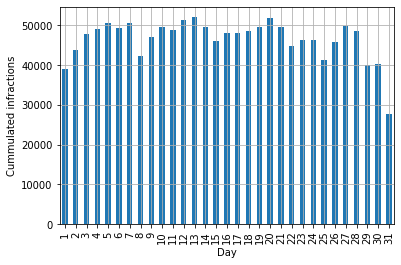

In [37]:
tmp = dfm["infraction_date"].groupby([dfm["infraction_date"].dt.day]).count().plot(kind="bar", grid=True)
tmp.set_xlabel("Day")
tmp.set_ylabel("Cummulated infractions")

En cuanto a la distribución por fecha del mes, no existen comportamientos interesantes y su distribución es regular.

Ahora, se puede explorar la distribución de los tipos de multas de acuerdo con la época y la hora del día, ya que tienen distribuciones interesantes. Para ello, se filtrarán las multas más comunes. Estos tipos de multa son:

* Sosta              
* Sensi unici, svolte   
* Limiti di Velocita'    
* Altre violazioni      
* Patente Scaduta di V    
* Uso telefonino        
* Revisione                 
* Cinture di sicurezza      
* Equipag./Efficienza      
* Senza assic./scaduta 

In [38]:
top_infractions = ["Sosta",
    "Sensi unici, svolte",
    "Limiti di Velocita'",
    "Altre violazioni",
    "Patente Scaduta di V",
    "Uso telefonino",
    "Revisione",
    "Cinture di sicurezza",
    "Equipag./Efficienza",
    "Senza assic./scaduta"]

In [39]:
mask = dfm_debugged["infraction_type"].isin(top_infractions)
dfm_debugged_masked = dfm_debugged[mask]
dfm_debugged_masked["infraction_type"].value_counts()

Sosta                   701580
Sensi unici, svolte     504007
Limiti di Velocita'     156549
Altre violazioni         22741
Patente Scaduta di V     15496
Uso telefonino            8002
Revisione                 6928
Cinture di sicurezza      6421
Equipag./Efficienza       2257
Senza assic./scaduta      2248
Name: infraction_type, dtype: int64

In [40]:
grouped = dfm_debugged_masked.groupby([dfm_debugged["infraction_type"]])

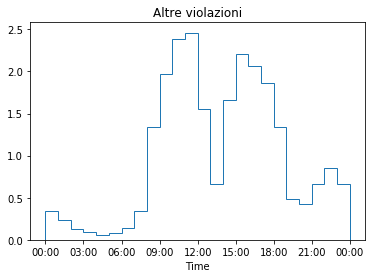

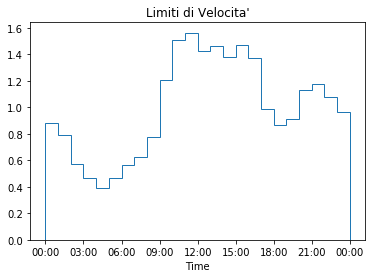

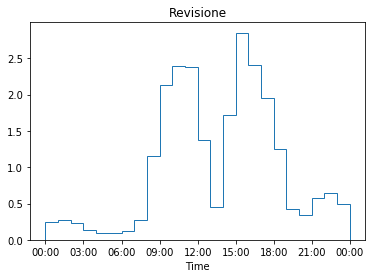

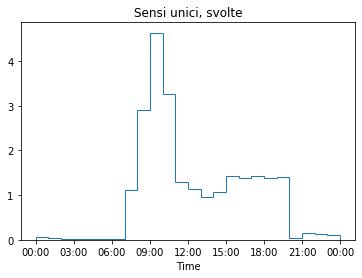

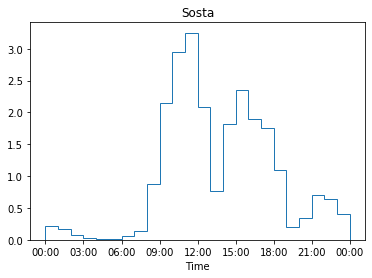

In [41]:
for group in grouped:
    fig, ax = plt.subplots()
    ax.set_title(group[0])
    ax.hist(group[1]["infraction_hour"], density=True, bins=24, histtype="step")
    ax.set_xlabel("Time")
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

De acuerdo con los histogramas mostrados anteriormente, es posible notar que una distribución normal de las multas para varios de los casos es muy común en los periodos laborales diurnos italianos: 9:00-13:00, 14:00-18:00. Estos tipos de multa son, usualmente:

* Cinturón de seguridad (Cinture di sicurezza)
* Revisión técnica (Revisione)
* Seguro vencido/ausente (Senza assic./scaduta)
* Parqueo indebido (Sosta)
* Uso telefónico (Uso telefonino)

Sin embargo, existen algunos casos donde la distribución suele ser distinta. Por ejemplo, en el caso de vehículos sobrecargados (Equipag./Efficienza), la distribución suele tener la superposición de tres campanas gaussianas: en horas laborales y en horas nocturnas (21:00-3:00).

En el caso de la violación a los límites de velocidad (Limiti di Velocità), la distribución parece ser cuasiregular, con una disminución en las horas de la madrugada (3:00-6:00). Esto indica la posibilidad de la presencia de controles de velocidad automáticos.

Por otra parte, la conducción en sentido contrario (Sinsi unici, svolte) es más notorio en las horas de la mañana, donde las personas se desplazan a sus sitios de trabajo. Igualmente, se nota que es mayor en horas del día comparado a las horas de la noche.

Finalmente, dentro del caso más extravagante en términos de distribución, tenemos el permiso de circulación del vehículo vencido (Patente Scaduta di V.).La distribución sigue una distribución cuasiexponencial durante las horas del día, alcanzando un pico a las 18:00. En estos casos, los controles son probablemente manuales, ya que no se identifican muchos casos a horas de la noche. 

### Estudio de los tipos de vehículos multados en las horas del dia

Esta inspección es interesante desde el punto de vista de analizar la circulación de vehículos a ciertas horas del día y qué tan controlados están con respecto al tipo de multa. Se podrían analizar casos donde los controles automáticos no son efectivos, por ejemplo. 

Suponiendo un caso como el visto en Corso Della Unità d'Italia 96, puede que las motocicletas burlen este tipo de sistemas y sean más complicadas de controlar comparado a vehículos corrientes. Igualmente, podríamos mejorar la hipótesis de la presencia de controles automáticos mediante la inspección del tipo de multas realizados en dicho lugar. 

Por lo tanto, para esta sección, se estudiarán:

* Los posibles puntos donde se controla toda la ruta de **Corso Della Unità d'Italia**: con la finalidad de buscar puntos cercanos al 96.
* Los tipos de multa que se realizan
* Los tipos de vehículos multados.

**Puntos de Corso Della Unità d'Italia**

In [42]:
mask = dfm_debugged["infraction_location"] == "UNITA' D'ITALIA/(CORSO)"
dfm_debugged[mask].head()

vehicle_class infraction_date      infraction_location     infraction_hour  \
0   Autovettura      2017-01-01  UNITA' D'ITALIA/(CORSO) 1900-01-01 00:00:00   
2   Autovettura      2017-01-01  UNITA' D'ITALIA/(CORSO) 1900-01-01 00:05:00   
3   Autovettura      2017-01-01  UNITA' D'ITALIA/(CORSO) 1900-01-01 00:06:00   
6   Autovettura      2017-01-01  UNITA' D'ITALIA/(CORSO) 1900-01-01 00:13:00   
7   Autovettura      2017-01-01  UNITA' D'ITALIA/(CORSO) 1900-01-01 00:17:00   

       infraction_type     infraction_time    infraction_location_full  \
0  Limiti di Velocita' 2017-01-01 00:00:00  UNITA' D'ITALIA/(CORSO) 96   
2  Limiti di Velocita' 2017-01-01 00:05:00  UNITA' D'ITALIA/(CORSO) 96   
3  Limiti di Velocita' 2017-01-01 00:06:00  UNITA' D'ITALIA/(CORSO) 96   
6  Limiti di Velocita' 2017-01-01 00:13:00  UNITA' D'ITALIA/(CORSO) 96   
7  Limiti di Velocita' 2017-01-01 00:17:00  UNITA' D'ITALIA/(CORSO) 96   

   number_warnings  number_infractions  
0                1                   1  
2                1                   1  
3                1                   1  
6                1                   1  
7                1                   1

In [43]:
dfm_debugged[mask]["infraction_location_full"].value_counts()

UNITA' D'ITALIA/(CORSO) 96     110686
UNITA' D'ITALIA/(CORSO)           229
UNITA' D'ITALIA/(CORSO) 0          31
UNITA' D'ITALIA/(CORSO) 40         25
UNITA' D'ITALIA/(CORSO) 70          4
UNITA' D'ITALIA/(CORSO) 135         3
UNITA' D'ITALIA/(CORSO) 578         1
UNITA' D'ITALIA/(CORSO) 217         1
UNITA' D'ITALIA/(CORSO) 133         1
UNITA' D'ITALIA/(CORSO) 95          1
Name: infraction_location_full, dtype: int64

La mayoría de infracciones ocurren en el número cívico 96. Ahora, filtrando dicho número cívico, es hora de inspeccionar los tipos de multas que se desarrollan en dicho lugar.

In [44]:
mask = dfm_debugged["infraction_location_full"] == "UNITA' D'ITALIA/(CORSO) 96"
dfm_debugged[mask].head()

vehicle_class infraction_date      infraction_location     infraction_hour  \
0   Autovettura      2017-01-01  UNITA' D'ITALIA/(CORSO) 1900-01-01 00:00:00   
2   Autovettura      2017-01-01  UNITA' D'ITALIA/(CORSO) 1900-01-01 00:05:00   
3   Autovettura      2017-01-01  UNITA' D'ITALIA/(CORSO) 1900-01-01 00:06:00   
6   Autovettura      2017-01-01  UNITA' D'ITALIA/(CORSO) 1900-01-01 00:13:00   
7   Autovettura      2017-01-01  UNITA' D'ITALIA/(CORSO) 1900-01-01 00:17:00   

       infraction_type     infraction_time    infraction_location_full  \
0  Limiti di Velocita' 2017-01-01 00:00:00  UNITA' D'ITALIA/(CORSO) 96   
2  Limiti di Velocita' 2017-01-01 00:05:00  UNITA' D'ITALIA/(CORSO) 96   
3  Limiti di Velocita' 2017-01-01 00:06:00  UNITA' D'ITALIA/(CORSO) 96   
6  Limiti di Velocita' 2017-01-01 00:13:00  UNITA' D'ITALIA/(CORSO) 96   
7  Limiti di Velocita' 2017-01-01 00:17:00  UNITA' D'ITALIA/(CORSO) 96   

   number_warnings  number_infractions  
0                1                   1  
2                1                   1  
3                1                   1  
6                1                   1  
7                1                   1

In [45]:
dfm_debugged[mask]["infraction_type"].value_counts()

Limiti di Velocita'    110685
Altre violazioni            1
Name: infraction_type, dtype: int64

Se puede observar que la mayoría son por límites de velocidad. Esto indica que la probabilidad de encontrar una cámara de regulación de velocidad en dicho punto es alto, por el caracter de las multas realizadas.

In [46]:
mask = dfm_debugged["infraction_location"] == "UNITA' D'ITALIA/(CORSO)"
dfm_debugged[mask]["infraction_type"].value_counts()

Limiti di Velocita'     110685
Sosta                      103
Uso telefonino              82
Altre violazioni            20
Revisione                   18
Senza assic./scaduta        16
Sensi unici, svolte         15
Velocita pericolosa         13
Cinture di sicurezza        10
Cambio di direzione          4
Guida infl.alcool            4
Precedenza                   3
Equipag./Efficienza          3
Senza carta di circ.         2
Senza tagliando              1
Segnaletica orizz.           1
Senza patente                1
Posizione veicoli            1
Name: infraction_type, dtype: int64

Por otra parte, todas las multas hechas por concepto de velocidad a lo largo de dicha carretera son realizados en dicho punto. No obstante, es posible notar que existen algunas multas por velocidad peligrosa (Velocita Pericolosa). Esto hace notar que también se realizan otra clase de controles. Para inspeccionar mejor dichos puntos de control, podríamos ver una distribución de las multas por cada punto, excluyendo a lo ya conocido (número cívico 96).

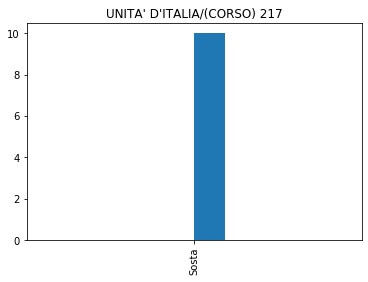

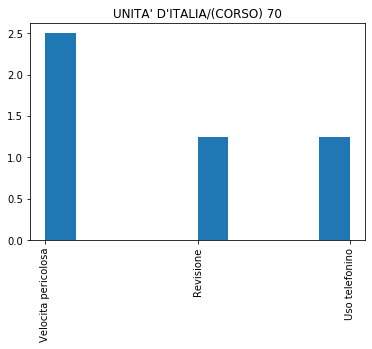

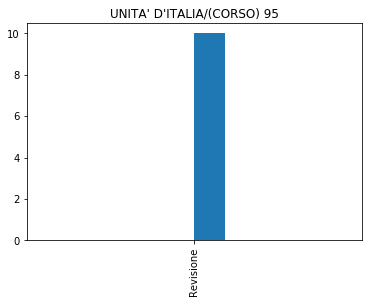

In [47]:
mask = (dfm_debugged["infraction_location"] == "UNITA' D'ITALIA/(CORSO)") & (dfm_debugged["infraction_location_full"] != "UNITA' D'ITALIA/(CORSO) 96")
grouped = dfm_debugged[mask].groupby(["infraction_location_full"])

for group in grouped:
    fig, ax = plt.subplots()
    ax.set_title(group[0])
    ax.hist(group[1]["infraction_type"], density=True, histtype="bar")
    ax.tick_params(axis='x', labelrotation=90)

Se pueden suponer los gráficos anteriores en una forma compuesta para denotar cuales son las principales razones de multa. Analizando con el mapa se pueden aclarar el porqué de los diversos tipos de multa.

![](https://i.ibb.co/94MCBcy/pins.png)


De acuerdo con el mapa, la mayor parte de las multas distintas a: uso del teléfono, revisión, conducción bajo efectos del alcohol o velocidad son parte de la autopista. Los otros casos, como parqueo, son predominantes cerca de del Museo del Automovil de Turin, ya que se encuentra más al interior de una serie de edificios que de la carretera.

In [48]:
mask = (dfm_debugged["infraction_location"] == "UNITA' D'ITALIA/(CORSO)") & (dfm_debugged["infraction_location_full"] != "UNITA' D'ITALIA/(CORSO) 96")
dfm_debugged[mask]["infraction_type"].hist(density=True, xrot=90, bins=16)

A lo largo de dicha calle, es posible notar que el parqueo incorrecto y el uso telefónico son los motivos más predominantes para ser multado en dicha carretera.

Para finalizar con esta observación particular, queda observar los tipos de vehículos multados en Corso Unità d'Italia 96 para ver como se caracterizan los vehiculos de acuerdo con el control.

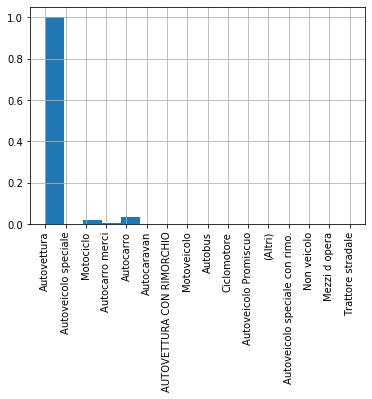

In [49]:
mask = dfm_debugged["infraction_location_full"] == "UNITA' D'ITALIA/(CORSO) 96"
dfm_debugged[mask]["vehicle_class"].hist(xrot=90, density=True, bins=16)

De acuerdo con el histograma anterior, el vehículo más multado suele ser el carro particular. Luego, se multan a camiones y motocicletas. Se puede notar que otros vehículos son rara vez multados.

### Analizando las multas de acuerdo con los lugares más populares

Para concluir, se analizarán la distribución de las multas más recurrentes en los lugares con más multas. Para ello, se requiere filtrar el dataset, luego realizar una agrupación por localización y un conteo de las multas de acuerdo con su tipo. Asimismo, se hará un cruce de los vehículos con las multas más recurrentes.

Posteriormente, se usará Seaborn para graficar un diagrama de barras para determinar la distribución de las multas.

In [118]:
top_infractions = ["Sosta",
    "Sensi unici, svolte",
    "Limiti di Velocita'",
    "Altre violazioni",
    "Patente Scaduta di V",
    "Uso telefonino",
    "Revisione",
    "Cinture di sicurezza",
    "Equipag./Efficienza",
    "Senza assic./scaduta"]

top_locations = ["UNITA' D'ITALIA/(CORSO)", 
              "VENTI SETTEMBRE/(VIA)",
              "REGINA MARGHERITA/(CORSO)",
              "ACCADEMIA ALBERTINA/(VIA)",
              "MILANO/(VIA)"]

mask = dfm_debugged["infraction_type"].isin(top_infractions) & dfm_debugged["infraction_location"].isin(top_locations)

In [153]:
tmp = (dfm_debugged[mask].groupby("infraction_location"))["infraction_type"].value_counts(normalize=True).rename('proportion').reset_index().sort_values("infraction_type")
tmp

infraction_location       infraction_type  proportion
16  REGINA MARGHERITA/(CORSO)      Altre violazioni    0.009820
2   ACCADEMIA ALBERTINA/(VIA)      Altre violazioni    0.000685
26    UNITA' D'ITALIA/(CORSO)      Altre violazioni    0.000180
34      VENTI SETTEMBRE/(VIA)      Altre violazioni    0.000707
9                MILANO/(VIA)      Altre violazioni    0.000077
12               MILANO/(VIA)  Cinture di sicurezza    0.000026
19  REGINA MARGHERITA/(CORSO)  Cinture di sicurezza    0.003297
30    UNITA' D'ITALIA/(CORSO)  Cinture di sicurezza    0.000090
5   ACCADEMIA ALBERTINA/(VIA)  Cinture di sicurezza    0.000057
36      VENTI SETTEMBRE/(VIA)  Cinture di sicurezza    0.000079
6   ACCADEMIA ALBERTINA/(VIA)   Equipag./Efficienza    0.000019
38      VENTI SETTEMBRE/(VIA)   Equipag./Efficienza    0.000047
31    UNITA' D'ITALIA/(CORSO)   Equipag./Efficienza    0.000027
20  REGINA MARGHERITA/(CORSO)   Equipag./Efficienza    0.001298
23    UNITA' D'ITALIA/(CORSO)   Limiti di Velocita'    0.997594
13  REGINA MARGHERITA/(CORSO)   Limiti di Velocita'    0.664761
22  REGINA MARGHERITA/(CORSO)  Patente Scaduta di V    0.000351
40      VENTI SETTEMBRE/(VIA)  Patente Scaduta di V    0.000031
18  REGINA MARGHERITA/(CORSO)             Revisione    0.003384
37      VENTI SETTEMBRE/(VIA)             Revisione    0.000079
4   ACCADEMIA ALBERTINA/(VIA)             Revisione    0.000095
27    UNITA' D'ITALIA/(CORSO)             Revisione    0.000162
10               MILANO/(VIA)             Revisione    0.000051
32      VENTI SETTEMBRE/(VIA)   Sensi unici, svolte    0.973187
7                MILANO/(VIA)   Sensi unici, svolte    0.994658
29    UNITA' D'ITALIA/(CORSO)   Sensi unici, svolte    0.000135
15  REGINA MARGHERITA/(CORSO)   Sensi unici, svolte    0.067616
0   ACCADEMIA ALBERTINA/(VIA)   Sensi unici, svolte    0.994727
11               MILANO/(VIA)  Senza assic./scaduta    0.000051
28    UNITA' D'ITALIA/(CORSO)  Senza assic./scaduta    0.000144
21  REGINA MARGHERITA/(CORSO)  Senza assic./scaduta    0.000842
39      VENTI SETTEMBRE/(VIA)  Senza assic./scaduta    0.000047
24    UNITA' D'ITALIA/(CORSO)                 Sosta    0.000928
8                MILANO/(VIA)                 Sosta    0.005137
14  REGINA MARGHERITA/(CORSO)                 Sosta    0.244880
33      VENTI SETTEMBRE/(VIA)                 Sosta    0.025635
1   ACCADEMIA ALBERTINA/(VIA)                 Sosta    0.004245
17  REGINA MARGHERITA/(CORSO)        Uso telefonino    0.003753
35      VENTI SETTEMBRE/(VIA)        Uso telefonino    0.000188
3   ACCADEMIA ALBERTINA/(VIA)        Uso telefonino    0.000171
25    UNITA' D'ITALIA/(CORSO)        Uso telefonino    0.000739

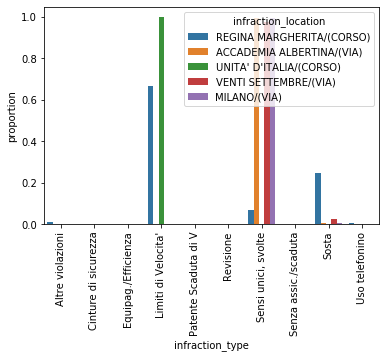

In [152]:
p = sns.barplot(x="infraction_type", y="proportion", hue="infraction_location", data=tmp)
_ = plt.setp(p.get_xticklabels(), rotation=90)  # Rotate labels

De acuerdo con el gráfico. La distribución de multas se da en tres principales clusters:

* Limite de velocidad: en carreteras
* Conducir en sentido contrario: en vias (avenidas, calles)
* Parqueo indebido: en la gran parte de los lugares, aunque es mas irregular.

Las interrogantes que yacen a partir de este gráfico son:

* ¿Por qué hay tantos casos de multas por conducción en sentido contrario?
* ¿Cómo se controlan los parqueos indebidos?
* ¿Por qué se da el comportamiento de los límites de velocidad?

Se pueden observar que en esos tres clusters, son los principales tipos de multas más recurrentes y más populares de acuerdo con análisis anteriores. Recordando:

1. Parqueo indebido
2. Conducción en sentido contrario
3. Limite de velocidad

Esto deja pie a que, son datos de importancia para posibles análisis de mejora de la educación vial o reforzamiento de otros posibles tipos de multas.

Para cerrar con el EDA, es necesario ver el impacto de las multas con respecto a los vehiculos. El procedimiento es similar al del último análisis.

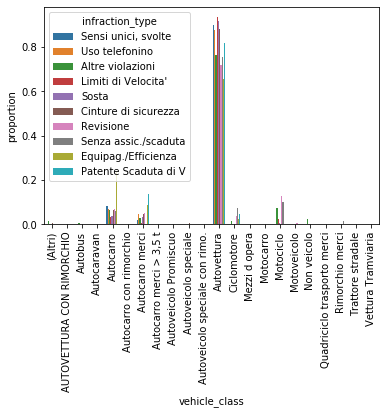

In [158]:
tmp = (dfm_debugged[mask].groupby("infraction_type"))["vehicle_class"].value_counts(normalize=True).rename('proportion').reset_index().sort_values("vehicle_class")
p = sns.barplot(x="vehicle_class", y="proportion", hue="infraction_type", data=tmp)
_ = plt.setp(p.get_xticklabels(), rotation=90)  # Rotate labels

Debido a que el diagrama es ilegible y se puede simplificar a aquellas categorías más importantes, se filtrarán aquellas categorías con poca relevancia. Las clases serán:

* Autocarro: trailer
* Autovettura: automóvil / que tiene una distribucion casi uniforme de todas las multas populares.
* Motociclo: motocicleta
* Ciclomotore: scooter
* Autocarro: trailer de mercancía

In [163]:
vehicle = ["Autocarro", "Motociclo", "Ciclomotore", "Autocarro merci"]
mask2 = tmp["vehicle_class"].isin(vehicle)
tmp2 = tmp[mask2] 

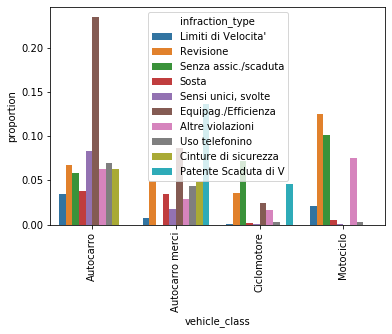

In [164]:
p = sns.barplot(x="vehicle_class", y="proportion", hue="infraction_type", data=tmp2)
_ = plt.setp(p.get_xticklabels(), rotation=90)  # Rotate labels

Observando los resultados obtenidos después de la simplificación, la mayor parte de las multras se concentra en los automóviles, seguido de los camiones de transporte. La mayor parte de las multas de los camiones son debidas a sobrecarga. En el caso de los scooters y las motocicletas, la revisión técnica y el seguro contra accidentes son las causales más frecuentes de multa.

Para aquellos camiones de mercancía, curiosamente, el permiso de circulación vencido es una de las principales causales de multa.